<a href="https://colab.research.google.com/github/akpax/FelinePredictor/blob/main/Multi_class_feline_image_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install fastbook
! pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [13]:
os.environ["AZUREKEY"] =

SyntaxError: invalid syntax (<ipython-input-13-b5dbff24d6ad>, line 1)

In [15]:
import os
key =  os.environ.get('AZUREKEY')
# print(key)

In [16]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [17]:
results = search_images_bing(key, 'tiger')
ims = results.attrgot('contentUrl')
len(ims)

150

In [18]:
cat_types = 'tiger','lion','cat'
path = Path('cats')

In [19]:
if not path.exists():
    path.mkdir()
    for o in cat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [20]:
fns = get_image_files(path)
fns

(#410) [Path('cats/cat/7b96a7a1-61dd-41d7-9d0d-8a515d70c4d1.jpg'),Path('cats/cat/79bccbb0-a6be-4105-ac45-56b1b8518b89.jpg'),Path('cats/cat/ee5e1b3a-056b-4990-b97a-1ac256759ca1.jpg'),Path('cats/cat/7a13ebbd-5875-46c0-858e-1433d4f31246.jpg'),Path('cats/cat/8b2f07ff-0420-4196-bd8f-2a2fb992b42e.jpg'),Path('cats/cat/e76cb91a-94b7-4ab5-a226-3c66a73884da.jpg'),Path('cats/cat/2a084ab1-52be-4522-96c0-35113a8fc13d.jpg'),Path('cats/cat/d6b1bc93-91a0-438c-ad15-5b703e61280d.jpg'),Path('cats/cat/f8008be0-2010-482b-b2db-2bef1ff25d32.jpg'),Path('cats/cat/dcfff885-8196-4766-a4e6-43a3dba0976a.jpg')...]

In [21]:
failed = verify_images(fns)
failed

(#5) [Path('cats/cat/9a415e31-6920-4e10-8736-ccd6a81ed7c4.jpg'),Path('cats/cat/8c6538f1-951c-4ddc-9873-8fea96d59aa2.png'),Path('cats/tiger/dead0305-1b66-499d-8dae-0dff720407ba.jpg'),Path('cats/tiger/785330c7-85ef-4241-b10c-f7556502e299.jpg'),Path('cats/lion/4ec5404d-8fd2-483d-a7bb-7a73cc8aead5.jpg')]

In [22]:
failed.map(Path.unlink);

In [ ]:
??verify_images

In [ ]:
path.dir

In [63]:
def get_y(o):
  return [str(Path(o).resolve().parent).split("/")[-1]]

# path = Path("/content/cats/cat/03bbe712-09b4-44d0-8262-052e711da9bd.jpg")
# path.resolve().parent
get_y("/content/cats/cat/03bbe712-09b4-44d0-8262-052e711da9bd.jpg")

['cat']

In [105]:
cats = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    item_tfms=RandomResizedCrop(128, min_scale=0.35))


In [106]:
path = Path("/content/cats")
dls = cats.dataloaders(path)


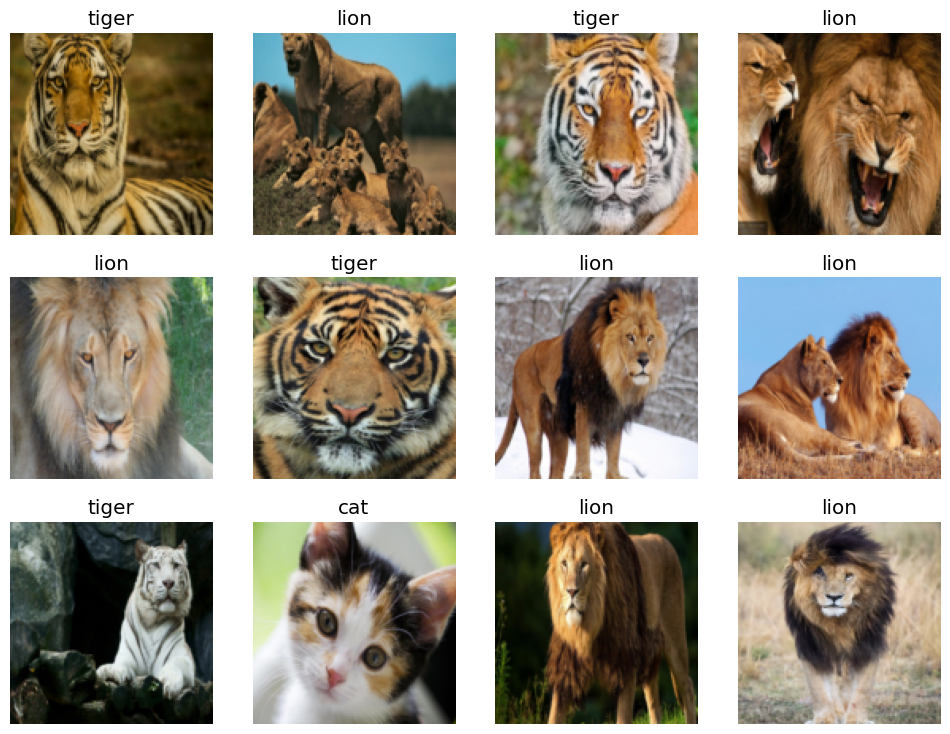

In [107]:
dls.valid.show_batch(max_n=12, nrows=3)

Go Forward w Random Resize crop

In [75]:
learn = vision_learner(dls, resnet18, metrics=accuracy_multi)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 58.3MB/s]


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.860796,0.216575,0.930041,00:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.246142,0.122981,0.934156,00:19
1,0.198412,0.064969,0.975309,00:18
2,0.159192,0.038283,0.987654,00:19
3,0.128203,0.033735,0.983539,00:21


,target,predicted,probabilities,loss
0,tiger,cat,"tensor([0.7192, 0.0054, 0.4304])",0.7061635255813599
1,tiger,lion;tiger,"tensor([0.0023, 0.5706, 0.9988])",0.28295502066612244
2,cat,cat;lion,"tensor([9.9946e-01, 5.6056e-01, 4.7213e-04])",0.2744259834289551
3,tiger,tiger,"tensor([0.0014, 0.4981, 0.9873])",0.2345253825187683
4,cat,cat,"tensor([0.9113, 0.3038, 0.0027])",0.1525672972202301
5,cat,cat,"tensor([0.9992, 0.0030, 0.3585])",0.14926409721374512
6,tiger,tiger,"tensor([0.3271, 0.0025, 0.9994])",0.13310471177101135
7,lion,lion,"tensor([0.0790, 0.9978, 0.2340])",0.11700014770030975
8,tiger,tiger,"tensor([1.9692e-04, 1.5203e-01, 9.9998e-01])",0.05504297837615013
9,lion,lion,"tensor([0.1345, 0.9998, 0.0056])",0.05011152848601341


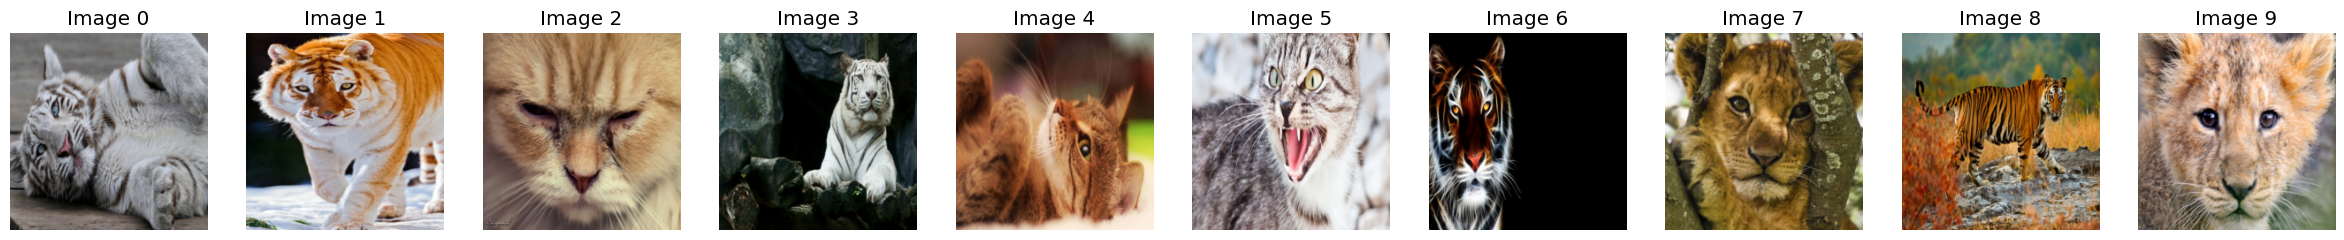

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, nrows=1)

In [84]:
preds,targs = learn.get_preds()

In [126]:
print(preds[:5])

tensor([[2.4966e-04, 2.9820e-04, 1.0000e+00],
        [3.4606e-03, 9.9935e-01, 8.1644e-03],
        [8.8715e-04, 6.4696e-04, 1.0000e+00],
        [2.1460e-03, 1.0000e+00, 3.1655e-03],
        [1.2604e-03, 1.0000e+00, 5.6915e-03]])


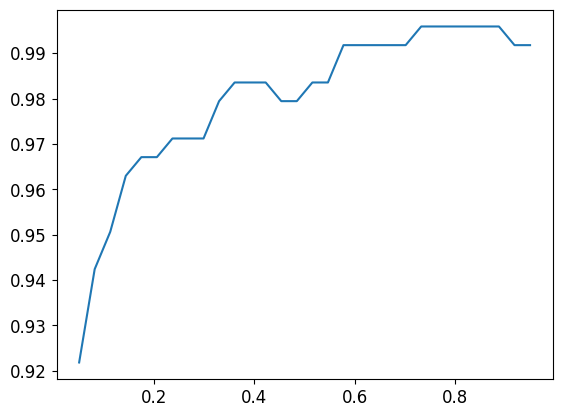

In [88]:
# tune calssifier theshold hyperparam
xs = torch.linspace(0.05,0.95,30)
# note sigmoid is set as false since we have allready applied the sigmoid fucntion
# to our predicitons
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs)

In [118]:
learn = vision_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.9))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.991919,0.639891,0.716049,00:19
1,0.777689,0.261269,0.950617,00:17
2,0.591043,0.171581,0.962963,00:18
3,0.472622,0.146164,0.950617,00:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.107718,0.110459,0.962963,00:17
1,0.084990,0.097896,0.975309,00:18
2,0.073881,0.088714,0.967078,00:18


In [96]:
#test if prediciton given for iamge that is not a cat
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

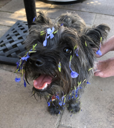

In [119]:
test_image = PILImage.create(btn_upload.data[-1])
display(test_image.to_thumb(128,128))

In [125]:
learn.predict(test_image) #hmmm ??

((#1) ['cat'], tensor([ True, False, False]), tensor([0.7756, 0.0084, 0.3581]))

In [113]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()